In [1]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def format_csv(path : str):
    dataset_input  = pd.read_csv(path)
    domains_unique = dataset_input['domain'].unique()
    output_dict = {'timestamp':list()}
    for domain in domains_unique: output_dict[domain]=list()
    for timestamp in dataset_input['timestamp'].unique():
        x = dataset_input.loc[dataset_input['timestamp'] == timestamp]
        output_dict['timestamp'].append(timestamp)
        for domain in domains_unique: 
            serie = x.loc[x['domain'] == domain]['measure']
            output_dict[domain].append(serie.iloc[0]) if len(serie)>0 else output_dict[domain].append(None)
    return pd.DataFrame(output_dict)

def merge_datasets(input_datasets : dict):
    for name, dataset in input_datasets.items(): dataset['dataset'] = name
    return pd.concat(input_datasets.values())

def delta_from_merge(merged_dataset : pd.DataFrame, delta_between : list):
    filtered_dataset = {}
    for dataset in delta_between:
        filtered_dataset[dataset] = dataset_merged.loc[dataset_merged['dataset'] == dataset]
    
    unique_keys = list(dataset_merged.keys())
    unique_keys.remove('timestamp')
    unique_keys.remove('dataset')
    pd.set_option('mode.chained_assignment', None)
    for key in unique_keys:
        filtered_dataset[delta_between[0]][key + '_delta'] = filtered_dataset[delta_between[1]][key] - filtered_dataset[delta_between[0]][key]
        filtered_dataset[delta_between[0]][key + '_delta%'] = (filtered_dataset[delta_between[0]][key + '_delta']/filtered_dataset[delta_between[1]][key])*100

    return filtered_dataset[delta_between[0]]

# Compare DEF to SMT consolidation on tornado w/without turboboost

## scaling_driver: acpi-cpufreq

In [17]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-defall-turbo.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-defall-turbo.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-smtall-turbo.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-smtall-turbo.csv')

dataset_turbo = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

In [20]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-defall-turbo.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-defall-turbo.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-smtall-turbo.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-smtall-turbo.csv')

dataset_turbo = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-defaultall-noturbo.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-defaultall-noturbo.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-smtall-noturbo.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-smtall-noturbo.csv')

dataset_noturbo = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

g = sns.scatterplot(data=dataset_noturbo, x='cpu%_package-global', y='package-global', hue='dataset', ax=axs[0])
g.set_xlim(25, 35)
axs[0].set_title('Turboboost disabled')
g = sns.scatterplot(data=dataset_turbo, x='cpu%_package-global', y='package-global', hue='dataset', ax=axs[1])
axs[1].set_title('Turboboost enabled')

In [15]:
dataset_def.head()

,timestamp,package-1,core-0,package-0,core-1,package-global,cpu%_package-global,cpu%_package-1,freq_package-1,cpu%_package-0,freq_package-0,dataset
0,4,50.94436,0.00256,53.12934,0.0,104.07369,0.02050,0.00585,1.793297e+06,0.03899,1.794965e+06,default
1,8,51.35131,0.00272,53.53497,0.0,104.88628,0.02148,0.01365,1.795240e+06,0.02930,1.794879e+06,default
2,12,51.62616,0.00337,53.82896,0.0,105.45512,0.02929,0.00195,1.795034e+06,0.03905,1.794857e+06,default
3,16,50.86014,0.00224,53.05062,0.0,103.91076,0.01855,0.00195,1.794764e+06,0.03331,1.794846e+06,default
4,20,50.86402,0.00257,53.04671,0.0,103.91073,0.02246,0.01172,1.795059e+06,0.03519,1.794746e+06,default


<Axes: xlabel='cpu%_package-global', ylabel='freq_package-0'>

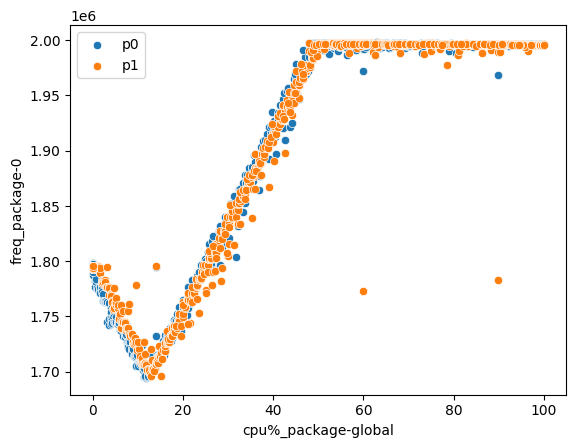

In [21]:
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='freq_package-0', label='p0')
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='freq_package-1', label='p1')

<Axes: xlabel='cpu%_package-global', ylabel='freq_package-0'>

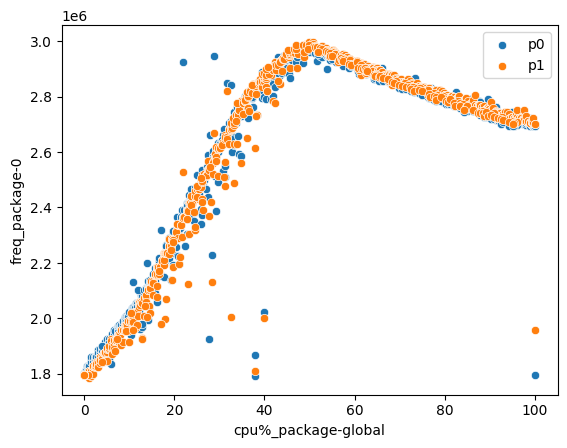

In [19]:
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='freq_package-0', label='p0')
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='freq_package-1', label='p1')

<Axes: xlabel='cpu%_package-global', ylabel='package-global'>

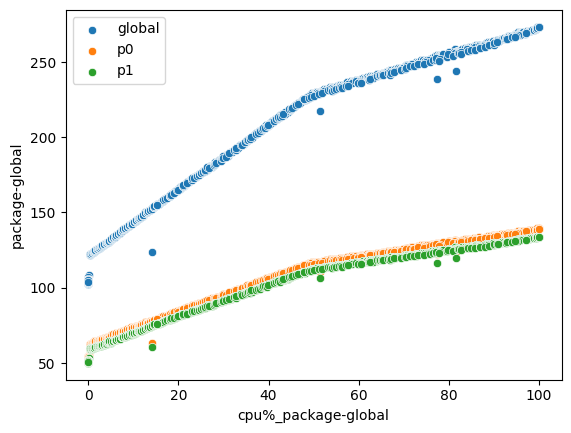

In [14]:
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='package-global', label='global')
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='package-0', label='p0')
sns.scatterplot(data=dataset_def, x='cpu%_package-global', y='package-1', label='p1')

[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'CPU%')]

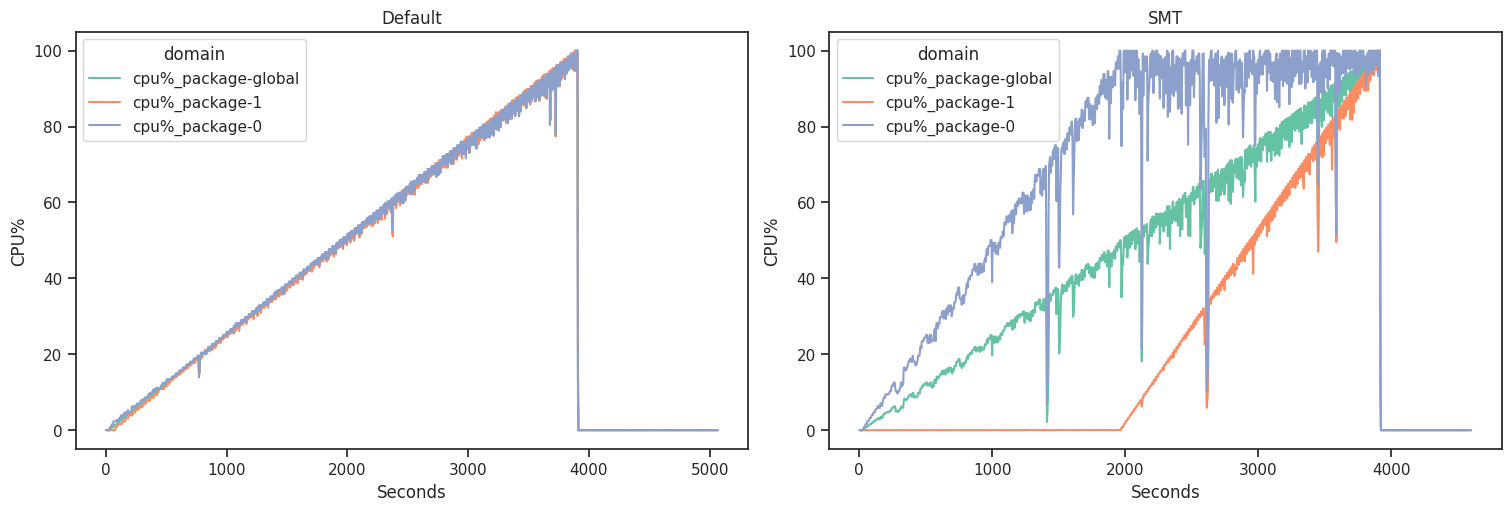

In [5]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('cpu%_package-'): package_domains_watt.append(domain)
palette = sns.color_palette("Set2", len(package_domains_watt))

sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='CPU%')

sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='CPU%')

[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'Watts')]

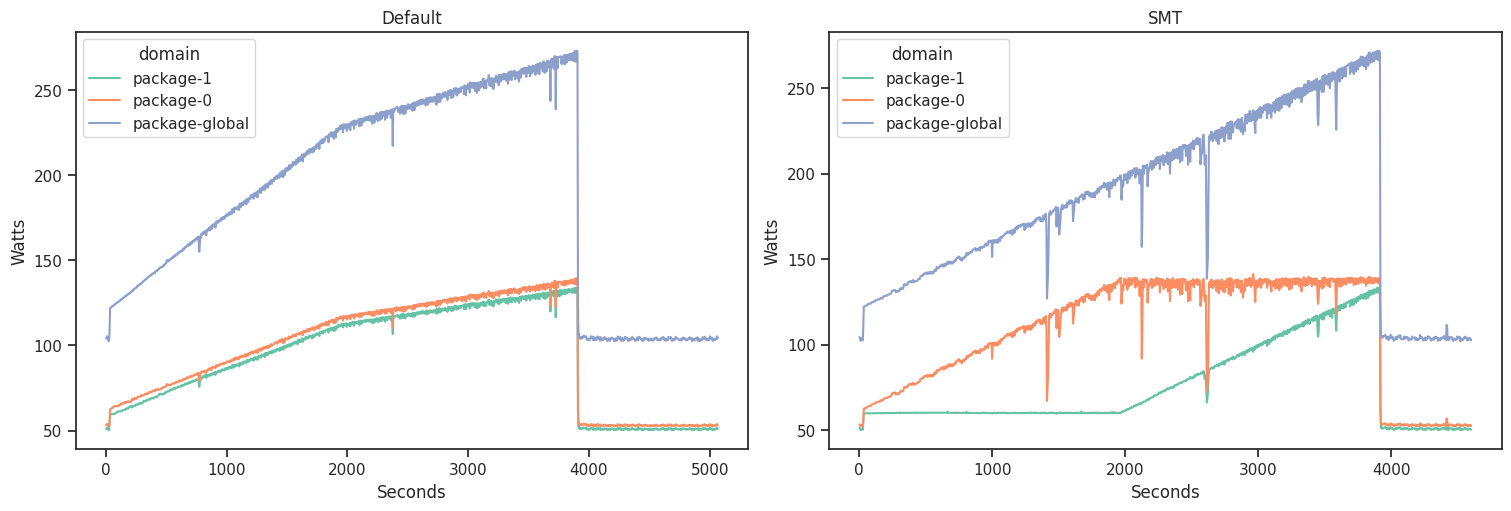

In [9]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
palette = sns.color_palette("Set2", len(package_domains_watt))

sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='Watts')

sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='Watts')

[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'Watts')]

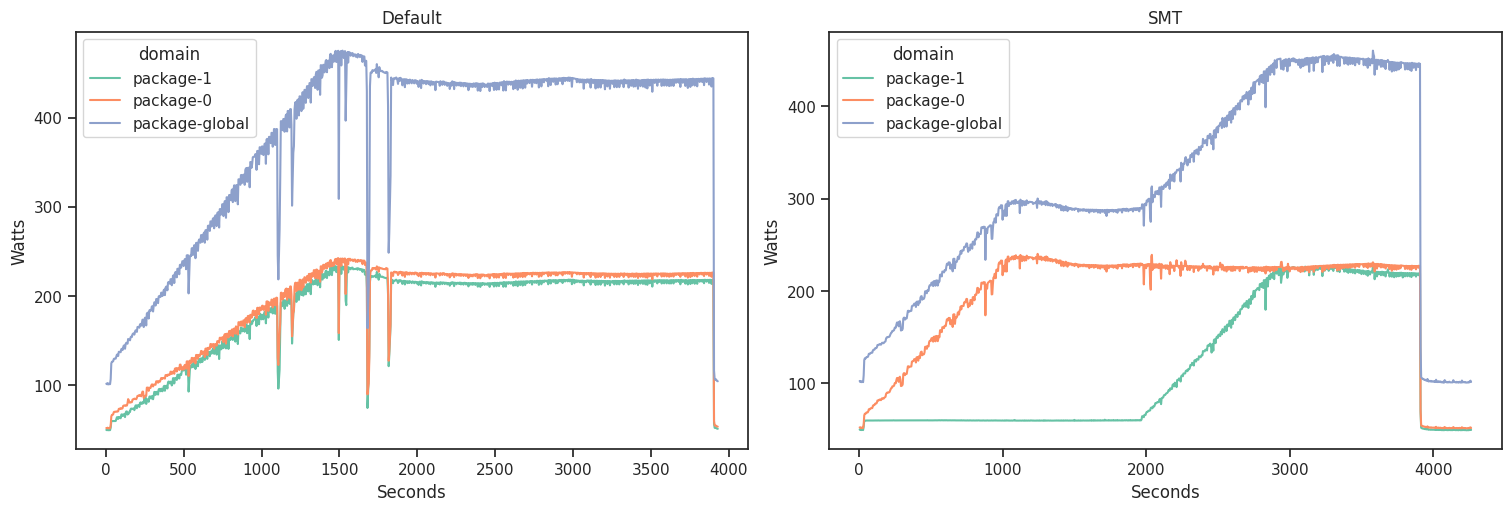

In [15]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
palette = sns.color_palette("Set2", len(package_domains_watt)) 

sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='Watts')

sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='Watts')

# Yeti: 4 sockets

## scaling_driver: intel_pstate turbo

In [4]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/yeti2-def.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/yeti2-def.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/yeti2-smt.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/yeti2-smt.csv')

dataset_yeti = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

<Axes: xlabel='cpu%_package-global', ylabel='package-global'>

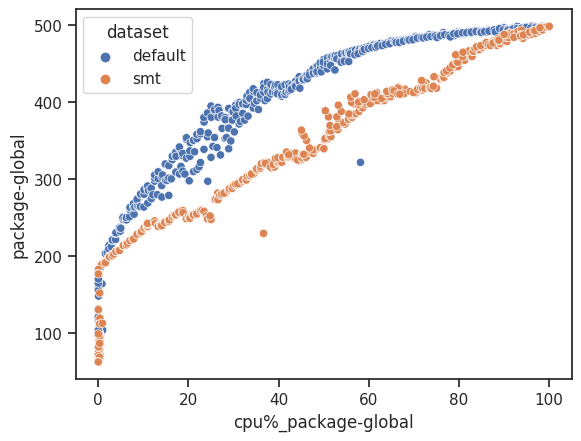

In [45]:
sns.scatterplot(data=dataset_yeti, x='cpu%_package-global', y='package-global', hue='dataset')

<Axes: xlabel='timestamp', ylabel='cpu%_package-global'>

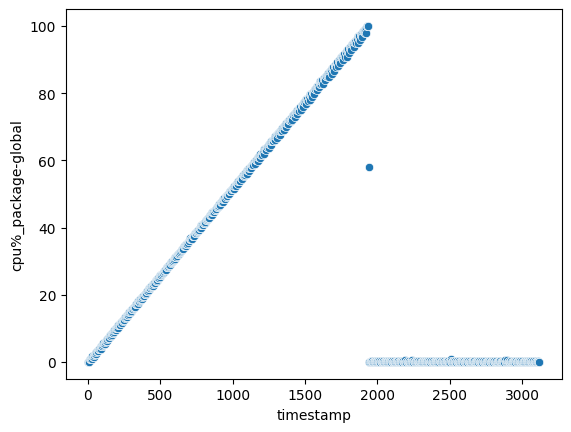

In [11]:
sns.scatterplot(data=dataset_def, x='timestamp', y='cpu%_package-global')

<Axes: xlabel='timestamp', ylabel='freq_package-0'>

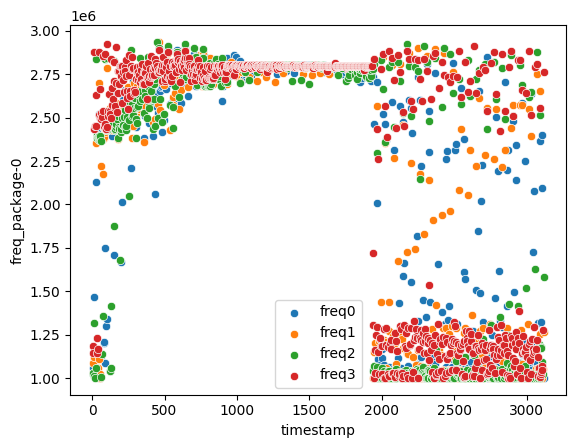

In [10]:
x_key = 'timestamp'
sns.scatterplot(data=dataset_def, x=x_key, y='freq_package-0', label='freq0')
sns.scatterplot(data=dataset_def, x=x_key, y='freq_package-1', label='freq1')
sns.scatterplot(data=dataset_def, x=x_key, y='freq_package-2', label='freq2')
sns.scatterplot(data=dataset_def, x=x_key, y='freq_package-3', label='freq3')

[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'Watts')]

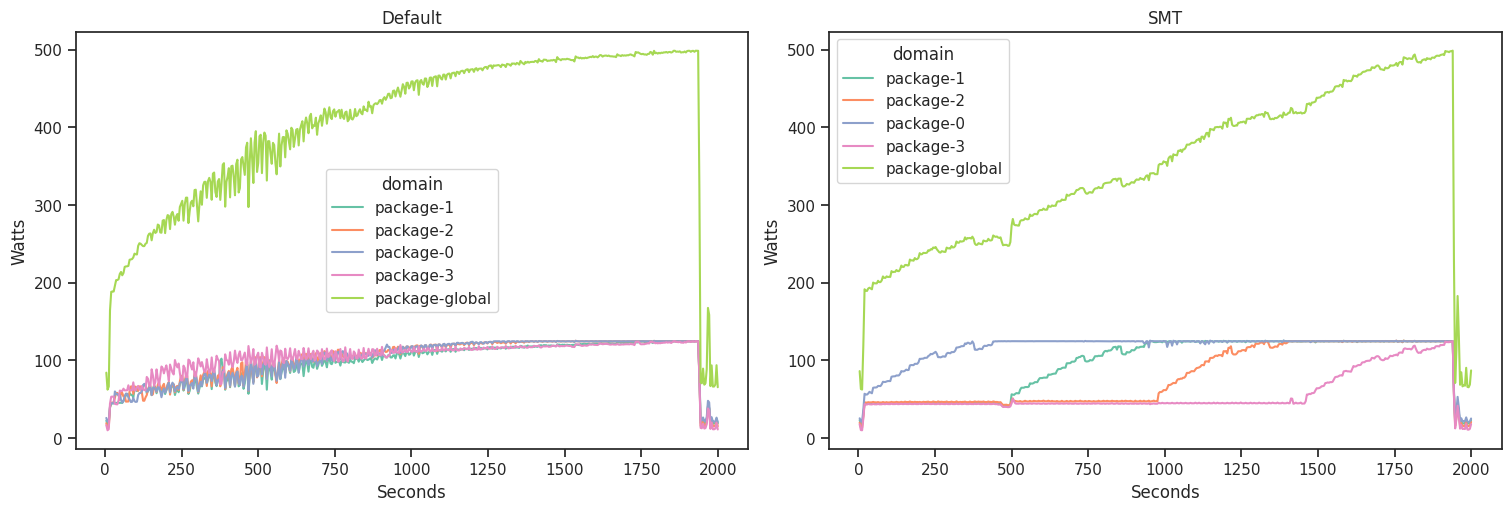

In [44]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
    
sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

dataset_def_raw = dataset_def_raw.drop(dataset_def_raw[dataset_def_raw['timestamp'] > 2000].index)
sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='Watts')

dataset_smt_raw = dataset_smt_raw.drop(dataset_smt_raw[dataset_smt_raw['timestamp'] > 2000].index)
sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='Watts')

# Gros : the bad boy

## scaling_driver: intel_pstate turbo

In [2]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/gros87-def2.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/gros87-def2.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/gros87-smt2.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/gros87-smt2.csv')

dataset_gros = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

<Axes: xlabel='cpu%_package-global', ylabel='package-global'>

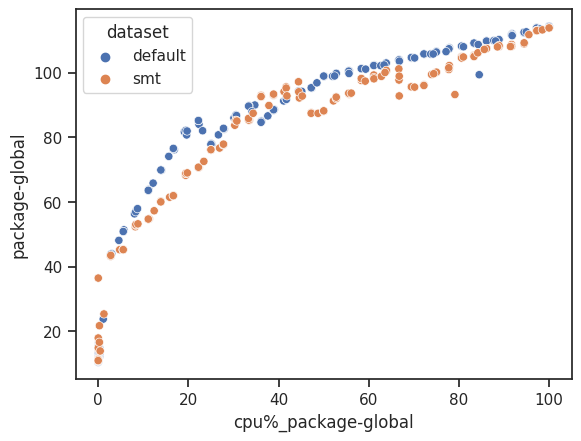

In [58]:
sns.scatterplot(data=dataset_gros, x='cpu%_package-global', y='package-global', hue='dataset')

In [ ]:
sns.scatterplot(data=dataset_gros, x='cpu%_package-global', y='package-global', hue='dataset')

Text(0.5, 1.0, 'SMT')

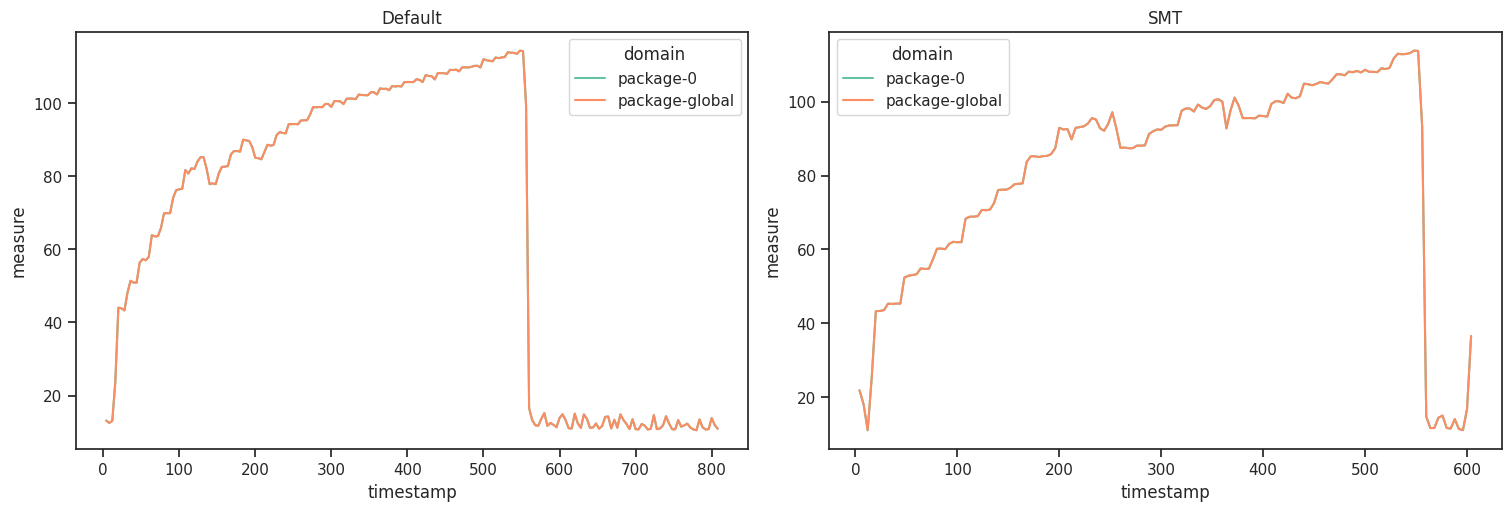

In [59]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
    
sns.set_theme(style="ticks")
palette = sns.color_palette("Set2", len(package_domains_watt))
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')

# Compare Oversubscription to no-pin

In [4]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230714-nopin.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230714-nopin.csv')
dataset_oc3 = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230717-oc3-fixed.csv')
dataset_oc3_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230717-oc3-fixed.csv')

dataset_merged = merge_datasets({'default':dataset_def, 'oc3':dataset_oc3})

<Axes: xlabel='cpu%_package-global', ylabel='package-global'>

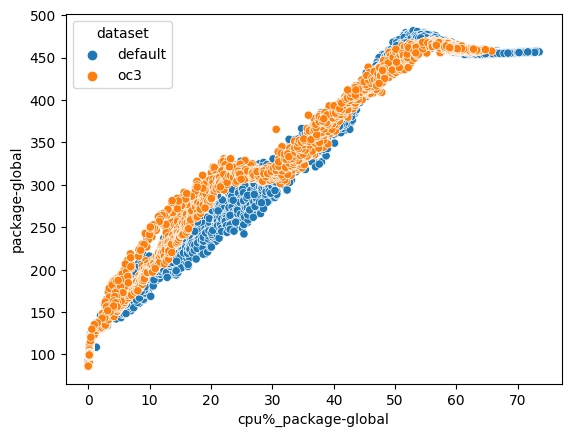

In [9]:
sns.scatterplot(data=dataset_merged, x='cpu%_package-global', y='package-global', hue='dataset')